In [1]:
# !pip install bing-image-downloader

In [2]:
# !mkdir Animal_DataSet

In [3]:
# from bing_image_downloader import downloader
# downloader.download('Ice-cream cone' , limit = 30 , output_dir = 'Image_DataSet' , adult_filter_off = True)
#  here we use Adult_filter because we dont ant to any unwanted image for the outof subject 

In [4]:
# downloader.download('Cow' , limit = 30 , output_dir = 'Animal_DataSet' , adult_filter_off = True)

In [5]:
# downloader.download('cars' , limit = 20 , output_dir = 'Image_DataSet' , adult_filter_off = True)

In [6]:
# downloader.download('Rose Flower' , limit = 30 , output_dir = 'Image_DataSet' , adult_filter_off = True)

In [7]:
# downloader.download('Sunflower' , limit = 30 , output_dir = 'Image_DataSet' , adult_filter_off = True)

In [8]:
# downloader.download('lily flower' , limit = 30 , output_dir = 'Image_DataSet' , adult_filter_off = True)

In [9]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from sklearn.metrics import accuracy_score , confusion_matrix

### PreProcessing 


In [10]:
data_Dir = 'C:\\Users\\Administrator\\Desktop\\ML\\Practice Quesion (Scaladge)\\ML_Projects\\Image_DataSet'
classes = ['cars' , 'Sunflower' , 'Dog' , 'Ice-cream cone']
X_Input = []
y_target = []
flat_Data = []

In [11]:
for category in classes:
    encoded_cate = classes.index(category)
    path = os.path.join(data_Dir , category)
    for img in os.listdir(path):
        x = plt.imread(os.path.join(path,img))
#         print(len(x))
        x_resized = resize(x , (150 , 150 , 3))
        y_target.append(encoded_cate)
        X_Input.append(x_resized)
        flat_Data.append(x_resized.flatten())
X_Input = np.array(X_Input)
y_target = np.array(y_target)
flat_Data = np.array(flat_Data)

In [12]:
y_target.shape

(84,)

In [13]:
np.unique(y_target , return_counts = True)

(array([0, 1, 2, 3]), array([19, 19, 20, 26], dtype=int64))

### Model build using ML(SVM , Decision Tree  for check better Accuracy )

In [14]:
x_scaled1 = flat_Data/255

In [15]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(x_scaled1 , y_target,  test_size = 0.3 , random_state = 109) 

### SVM

In [16]:
# Model build using SVM 

from sklearn.svm import SVC
svm_model1 = SVC(probability=True)
svm_model1.fit(xtrain , ytrain)
print(svm_model1.score(xtest , ytest))
svm_ypred = svm_model1.predict(xtest)
print(svm_ypred)

0.46153846153846156
[3 3 3 3 3 3 1 3 3 1 3 3 0 3 0 3 3 3 3 3 0 0 3 3 3 0]


In [17]:
svm_model1.get_params

<bound method BaseEstimator.get_params of SVC(probability=True)>

In [18]:
print(accuracy_score(svm_ypred, ytest))
con_svm = confusion_matrix(svm_ypred , ytest)

0.46153846153846156


Text(24.0, 0.5, 'Truth')

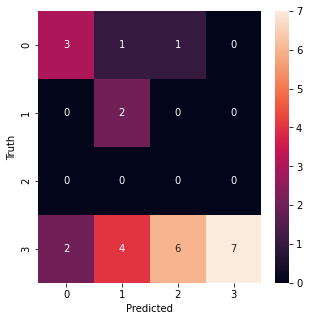

In [19]:
import seaborn as sb
plt.figure(figsize=(5,5))
sb.heatmap(con_svm , annot=True ,fmt='d')
plt.xlabel('Predicted')
plt.ylabel("Truth")

### Decision Tree

In [20]:
# model build using Decision Tree

from sklearn.tree import DecisionTreeClassifier
tree_model1 = DecisionTreeClassifier()
tree_model1.fit(xtrain , ytrain)
print(tree_model1.score(xtest , ytest))
ypred_tree = tree_model1.predict(xtest)
print(ypred_tree)

0.34615384615384615
[2 2 3 1 1 3 2 3 2 1 2 3 0 1 1 1 2 2 0 2 1 3 2 1 2 2]


In [21]:
ytest

array([1, 0, 3, 2, 1, 2, 1, 2, 3, 1, 3, 3, 0, 1, 2, 1, 3, 3, 2, 2, 0, 1,
       2, 3, 0, 0])

In [22]:
print(accuracy_score(ypred_tree, ytest))
deci_conf = confusion_matrix(ypred_tree , ytest)

0.34615384615384615


Text(24.0, 0.5, 'Truth')

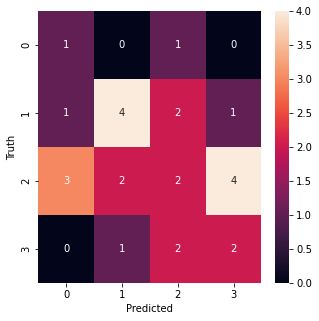

In [23]:
plt.figure(figsize=(5,5))
sb.heatmap(deci_conf , annot=True ,fmt='d')
plt.xlabel('Predicted')
plt.ylabel("Truth")

### Model Bulding Using CNN

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers , datasets , models 

from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X_Input , y_target,  test_size = 0.3 , random_state = 109) 

In [25]:
cnnModel = models.Sequential([
    
#     CNN Layers 
    layers.Conv2D(filters = 84 , kernel_size=(3,3) , activation = 'relu' , input_shape = (150,150,3)),
    layers.MaxPooling2D((2,2,)),
    
    layers.Conv2D(filters = 25 , kernel_size=(3,3) , activation = 'relu' , input_shape = (150,150,3)),
    layers.MaxPooling2D((2,2,)),
    
#     layers.Conv2D(filters = 56 , kernel_size=(3,3) , activation = 'relu' , input_shape = (50,50,3)),
#     layers.MaxPooling2D((2,2,)),
    
#     ANN Layers 
    layers.Flatten(input_shape = (150 , 150,3)),
    layers.Dense(84 , activation = 'relu'),
    layers.Dense(22 , activation = 'relu'),
    layers.Dense(4 , activation = 'sigmoid')

])

cnnModel.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

cnnModel.fit(x_train , y_train , epochs = 20)

Epoch 1/20
2/2 [==============================] - 19s 4s/step - loss: 1.5391 - accuracy: 0.2759
Epoch 2/20
2/2 [==============================] - 4s 2s/step - loss: 1.3617 - accuracy: 0.3793
Epoch 3/20
2/2 [==============================] - 4s 2s/step - loss: 1.2216 - accuracy: 0.3793
Epoch 4/20
2/2 [==============================] - 3s 1s/step - loss: 1.0503 - accuracy: 0.5690
Epoch 5/20
2/2 [==============================] - 3s 1s/step - loss: 0.7343 - accuracy: 0.7586
Epoch 6/20
2/2 [==============================] - 3s 1s/step - loss: 0.5732 - accuracy: 0.7931
Epoch 7/20
2/2 [==============================] - 3s 1s/step - loss: 0.3272 - accuracy: 0.9310
Epoch 8/20
2/2 [==============================] - 3s 1s/step - loss: 0.1859 - accuracy: 0.9828
Epoch 9/20
2/2 [==============================] - 3s 1s/step - loss: 0.0981 - accuracy: 1.0000
Epoch 10/20
2/2 [==============================] - 3s 1s/step - loss: 0.0578 - accuracy: 1.0000
Epoch 11/20
2/2 [==============================]

In [26]:
cnnModel.evaluate(x_test , y_test)

1/1 [==============================] - 4s 4s/step - loss: 2.7264 - accuracy: 0.6154


[2.726414918899536, 0.6153846383094788]

Text(24.0, 0.5, 'Truth')

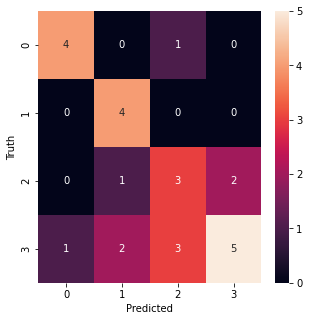

In [27]:
yPredCnn = cnnModel.predict(x_test)
ypredicted_labels = [np.argmax(x) for x in yPredCnn]
cnn_conf = confusion_matrix(ypredicted_labels , y_test)
plt.figure(figsize=(5,5))
sb.heatmap(cnn_conf , annot=True ,fmt='d')
plt.xlabel('Predicted')
plt.ylabel("Truth")

In [28]:
ypredicted_labels = [np.argmax(x) for x in yPredCnn]  # return the index of maximum value 
ypredicted_labels

[1, 0, 3, 2, 2, 3, 3, 3, 3, 1, 3, 3, 3, 1, 0, 1, 2, 2, 2, 3, 0, 3, 2, 3, 0, 0]

In [29]:
y_test

array([1, 0, 3, 2, 1, 2, 1, 2, 3, 1, 3, 3, 0, 1, 2, 1, 3, 3, 2, 2, 0, 1,
       2, 3, 0, 0])

In [30]:
yPredCnn[:5]

array([[2.1907656e-06, 9.9997729e-01, 2.2872984e-02, 9.9839342e-01],
       [9.9999964e-01, 5.9884489e-03, 3.7275791e-01, 9.9992049e-01],
       [8.6966610e-01, 1.1954606e-03, 9.9450922e-01, 9.9999899e-01],
       [6.5811276e-02, 1.4762878e-02, 9.9933350e-01, 9.9736476e-01],
       [2.1534497e-05, 4.0495396e-03, 9.9999988e-01, 9.9972510e-01]],
      dtype=float32)

### Improve the Accuracy using Data Augmentation

In [31]:
data_augmentation = models.Sequential([
        layers.experimental.preprocessing.RandomFlip('horizontal' , input_shape = (150 , 150 , 3)),
        layers.experimental.preprocessing.RandomRotation(0.2),
#         layers.experimental.preprocessing.RandomTranslation(0.1),
        layers.experimental.preprocessing.RandomFlip()
        
])

cnnModel_augme = models.Sequential([
    data_augmentation,
#     CNN Layers 
    layers.Conv2D(filters = 84 , kernel_size=(3,3) , activation = 'relu' , input_shape = (150,150,3)),
    layers.MaxPooling2D((2,2,)),
    
    layers.Conv2D(filters = 25 , kernel_size=(3,3) , activation = 'relu' , input_shape = (150,150,3)),
    layers.MaxPooling2D((2,2,)),
    
#     layers.Conv2D(filters = 10 , kernel_size=(3,3) , activation = 'relu' , input_shape = (50,50,3)),
#     layers.MaxPooling2D((2,2,)),
    
#     ANN Layers 
    layers.Flatten(input_shape = (150 , 150,3)),
    layers.Dense(84 , activation = 'relu'),
    layers.Dense(22 , activation = 'relu'),
    layers.Dense(4 , activation = 'sigmoid'),

])

cnnModel_augme.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

cnnModel_augme.fit(x_train , y_train , epochs = 40)

Epoch 1/40
2/2 [==============================] - 7s 2s/step - loss: 3.9185 - accuracy: 0.3276
Epoch 2/40
2/2 [==============================] - 4s 2s/step - loss: 1.5478 - accuracy: 0.2241
Epoch 3/40
2/2 [==============================] - 3s 1s/step - loss: 1.3880 - accuracy: 0.1897
Epoch 4/40
2/2 [==============================] - 3s 1s/step - loss: 1.3788 - accuracy: 0.4828
Epoch 5/40
2/2 [==============================] - 3s 1s/step - loss: 1.3360 - accuracy: 0.4310
Epoch 6/40
2/2 [==============================] - 3s 2s/step - loss: 1.3158 - accuracy: 0.2931
Epoch 7/40
2/2 [==============================] - 3s 1s/step - loss: 1.2598 - accuracy: 0.5000
Epoch 8/40
2/2 [==============================] - 3s 1s/step - loss: 1.2231 - accuracy: 0.4828
Epoch 9/40
2/2 [==============================] - 3s 1s/step - loss: 1.1612 - accuracy: 0.4655
Epoch 10/40
2/2 [==============================] - 3s 1s/step - loss: 1.0836 - accuracy: 0.6207
Epoch 11/40
2/2 [==============================] 

In [32]:
cnnModel_augme.evaluate(x_test , y_test)

1/1 [==============================] - 1s 739ms/step - loss: 1.3156 - accuracy: 0.6923


[1.3155853748321533, 0.692307710647583]

Text(24.0, 0.5, 'Truth')

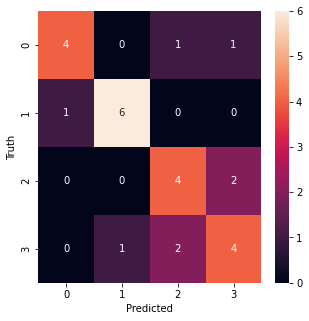

In [33]:
yPredCnn_aug = cnnModel_augme.predict(x_test)
yPredCnn_aug_label = [np.argmax(x) for x in yPredCnn_aug]
cnn_conf_aug = confusion_matrix(yPredCnn_aug_label , y_test)
plt.figure(figsize=(5,5))
sb.heatmap(cnn_conf_aug , annot=True ,fmt='d')
plt.xlabel('Predicted')
plt.ylabel("Truth")

In [34]:
# print(accuracy_score(ypred_tree, ytest))
# confusion_matrix(ypred_tree , ytest)

In [35]:
# #  Testing url 

# url = input()
# img = plt.imread(url)
# img_resize = img.resize((150 , 150 ,3))
# # plt.imshow(img_resize)
# # cnnModel_augme.predict(img_resize)

### using K-Fold Cross validation for SVM

In [36]:
from sklearn.model_selection import ShuffleSplit , cross_val_score
cv = ShuffleSplit(n_splits = 4 , test_size = 0.25 , random_state = 0)
cross_val_score(SVC(C = 1 , gamma = 8 ) , x_scaled1 , y_target , cv = cv)

array([0.61904762, 0.38095238, 0.47619048, 0.23809524])

In [37]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_minMaxscale = scale.fit_transform(flat_Data)

In [38]:
#  minmax scale is not working to improve accuracy 

cross_val_score(SVC(C = 1 , gamma = 1 ) , X_minMaxscale , y_target , cv = cv)

array([0.33333333, 0.23809524, 0.28571429, 0.33333333])

In [39]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.tree import DecisionTreeRegressor
# import pandas as pd
# from sklearn.svm import SVC

# def find_best_model_using_gridSearchCv(x , y):
#     algo = {
        
#         'decision_tree' : {
#             'model' : DecisionTreeRegressor() ,
#             'params' : {
#                 'criterion' : ['mse','friedman_mse'],
#                 'splitter': ['best','random']
#             }

#         } , 
        
#         'SVM' : {
#             'model' : SVC() , 
#             'params' : {
#                 'kernel':['linear'],
#                 'random_state' : [0,5,10,48,75],
#                 'gamma' : [0.1,0.01 ,1,5,8],
#                 'C' : [0.1,1,0.5,6,7] 
#             }
#         }
#     }
#     scores = []
#     cv = ShuffleSplit(n_splits = 5 , test_size = 0.2 , random_state = 0)
#     for algo_name , config in algo.items():
#         gs = GridSearchCV(config['model'] , config['params'] , cv = cv , return_train_score =  False)
#         gs.fit(x,y)
#         scores.append({
#             'model' : algo_name , 
#             'best_score' : gs.best_score_,
#             'best_params' : gs.best_params_
#         })
#     return pd.DataFrame(scores , columns = ['model' , 'best_score' , 'best_params'])
# find_best_model_using_gridSearchCv(x_scaled1 ,y_target )